1. Project Introduction
As the internet develops with drastic speed, Weibo has been utilised by people everywhere on a daily basis, people use multi-media-platformed ends such as PC, mobile phones, etc, to share real-time data including text, video, and picture. This analysis utilises Hive to thouroughly analyse and visualise the dataset.

2. Dataset Introduction
Entrysize: 23,000,00

Due to the dataset is in XML format that is not suitable for Hive to process, therefore the dataset is cleaned using Java in the following code 


import java.io.*;
import java.util.List;
import org.dom4j.Document;
import org.dom4j.DocumentException;
import org.dom4j.Element;
import org.dom4j.io.SAXReader;
import java.io.BufferedWriter;

public class dom4jDemo {

    public static void main(String[] args) {
        try {
            testSaxReader();
        } catch (Exception e) {
            e.printStackTrace();
        }

    }

    public static void testSaxReader() throws DocumentException, FileNotFoundException {
        SAXReader saxReader = new SAXReader();
        FileInputStream file = new FileInputStream("Users/Kurtability/NLPIR.xml");
        Document doc = saxReader.read(file);
        Element root = doc.getRootElement();
        System.out.println(root.getName());

        List<Element> childsElement = root.elements();
        for(Element child : childsElement) {
            if ("RECORD".equals(child.getName())) {
                Element id = child.element("id");
                Element article = child.element("article");
                Element transmit = child.element("transmit");
//                 Element insertTime  = child.element("insertTime");
                Element discuss = child.element("discuss");
                Element time = child.element("time");
                Element origin = child.element("origin");
                Element person_id = child.element("person_id");
                Element insertTime = child.element("insertTime");
                if ( transmit.getData().toString().length() == 0 || discuss.getData().toString().length() == 0 ||
                        person_id.getData().toString().length() == 0 || origin.getData().toString().length() ==0 ||
                        insertTime.getData().toString().length() == 0 || transmit.getData().toString().length() ==0 ||
                        time.getData().toString().length() ==0 || article.getData().toString().length() == 0) {
                    continue;
                }
                String line = id.getData() + "\t" + person_id.getData() + "\t" + transmit.getData() +
                        "\t" + discuss.getData() + "\t" + origin.getData() + "\t"
                        + insertTime.getData() + "\t" + time.getData() ;
                System.out.println(line);

                BufferedWriter out = null;
                try {
                    File f=new File("Users/Kurtability/web.txt");
                    out = new BufferedWriter(new OutputStreamWriter(new FileOutputStream(f, true)));
                    out.write(line+"\r\n");
                } catch (Exception e) {
                    e.printStackTrace();
                } finally {
                    try {
                        out.close();
                    } catch (IOException e) {
                        e.printStackTrace();
                    }
                }
            }

        }
    }
}

Cleaned dataset
423	1043652517	0	5	SinaWeibo	2011/11/18 11:08:16	2011/11/13 14:38:32
424	1043652517	0	1	AndroidClient	2011/11/18 11:08:16	2011/11/13 12:31:59
425	1043652517	0	2	SinaWeibo	2011/11/18 11:08:16	2011/11/13 00:53:28
426	1043652517	0	0	SinaWeibo	2011/11/18 11:08:16	2011/11/12 00:06:45
427	1043652517	0	0	SinaWeibo	2011/11/18 11:08:16	2011/11/12 00:05:49
428	1043652517	0	0	SinaWeibo	2011/11/18 11:08:16	2011/11/12 00:02:43
429	1043652517	0	0	SinaWeibo	2011/11/18 11:08:16	2011/11/12 00:02:07
430	1043652517	0	0	MeiTushow	2011/11/18 11:08:16	2011/11/7 20:45:45
431	1043652517	0	6	MeiTushow	2011/11/18 11:08:16	2011/11/7 20:24:01
432	1043652517	0	15	SinaWeibo	2011/11/18 11:08:16	2011/10/24 00:46:05
433	1043652517	0	0	SinaWeibo	2011/11/18 11:08:16	2011/10/22 23:38:02
434	1043652517	0	1	SinaWeibo	2011/11/18 11:08:16	2011/10/20 10:04:37
435	1043652517	0	3	SinaWeibo	2011/11/18 11:08:16	2011/10/20 10:04:02
436	1043652517	0	3	SinaWeibo	2011/11/18 11:08:16	2011/10/20 10:03:22

3. Data analysis goals
（1）Statistics of the top 10 user IDs with daily Weibo posts
（2）User IDs with the TOP 10 monthly retweets
（3）Proportion of client sources who post Weibo

4. Building a big data environment
1.Install a virtual machine based on workstation
（1）Install a virtual machine using Centos 7 image
（2  vim /etc/sysconfig/network-scripts/ifcfg-ens33 is modified to static ip
（3）Make the server and workstation in the same network segment and network management
（4）Restart the network and ping the external network
（5）Install the Xmanager suite, use the xshell link
2.Install Zookeeper cluster
（1）Function: Based on ZKFC (DFSZKFailoverController), master and slave elections are used to achieve failover
（2）Configure jdk and environment variables
（3）Start the Zookeeper cluster
3.Start Hadoop cluster
（1）Configure the ip and hostname mapping of the three hosts in /etc/hosts
（2）Master, Slave1, Slave2 realize mutual trust between two computers
（3）Configure configuration files, including core-site.xml, hdfs-site.xml, yarn-site.xml, mapred-site.xml
（4）hdfs namenode -format format hdfs
（5）start-all.sh start hadoop cluster

5. Data analysis
1. Create table in hive
hive>create table web(id string, person_id string, transmit string, discuss string, origin string, insertTime string, time string) Row FORMAT DELIMITED FIELDS TERMINATED BY '\t';

2.Load data into hive
hive>load data local inpath ‘web.txt’ into table web;

3.Load data into hive for detailed data analysis and visualization
（1）Statistics of TOP10 user IDs with daily Weibo posts
hive>select person_id,DATE_FORMAT(time, "yyyy-MM-dd"), count(id) as num from web group by person_id, DATE_FORMAT(time,"yyyy-MM-dd" ) order by  num desc limit 10;
1641561812	2011-12-21	390
1646051850	2011-11-24	360
1641561812	2011-11-24	360
1646051850	2011-12-01	354
1646051850	2011-11-23	354
1641561812	2011-12-19	349
1641561812	2011-11-22	348
1641561812	2011-12-07	336
1641561812	2011-12-20	335
1646051850	2011-11-15	318

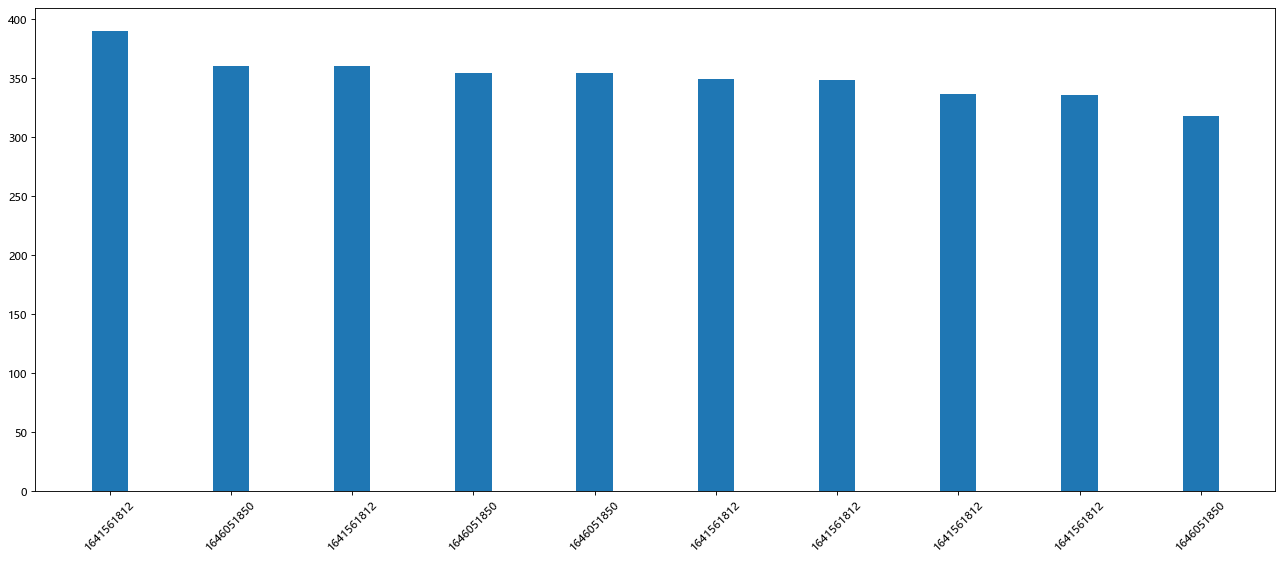

In [1]:
from  matplotlib import pyplot as plt
import matplotlib

font = {

    'family': 'Microsoft Yahei',

    "size": "10"

}
matplotlib.rc("font", **font)

a=['1641561812','1646051850','1641561812','1646051850','1646051850','1641561812','1641561812','1641561812','1641561812','1646051850']
b=[390,360,360,354,354,349,348,336,335,318]
plt.figure(figsize=(20,8),dpi=80)
plt.bar(range(len(a)),b,width=0.3)
plt.xticks(range(len(a)),a,rotation=45)
plt.show()

（2）User IDs with the TOP 10 monthly retweets
hive> select DATE_FORMAT(time, "yyyy-MM-dd"), sum(transmit) as num from web group by DATE_FORMAT(time, "yyyy-MM-dd") order by num desc limit 10;
2011-07-25	132753.0
2011-11-17	98748.0
2012-01-14	77722.0
2011-11-28	73578.0
2011-10-18	71047.0
2011-09-21	62444.0
2011-07-24	57083.0
2011-11-02	52226.0
2011-12-02	50072.0
2011-12-24	46442.0

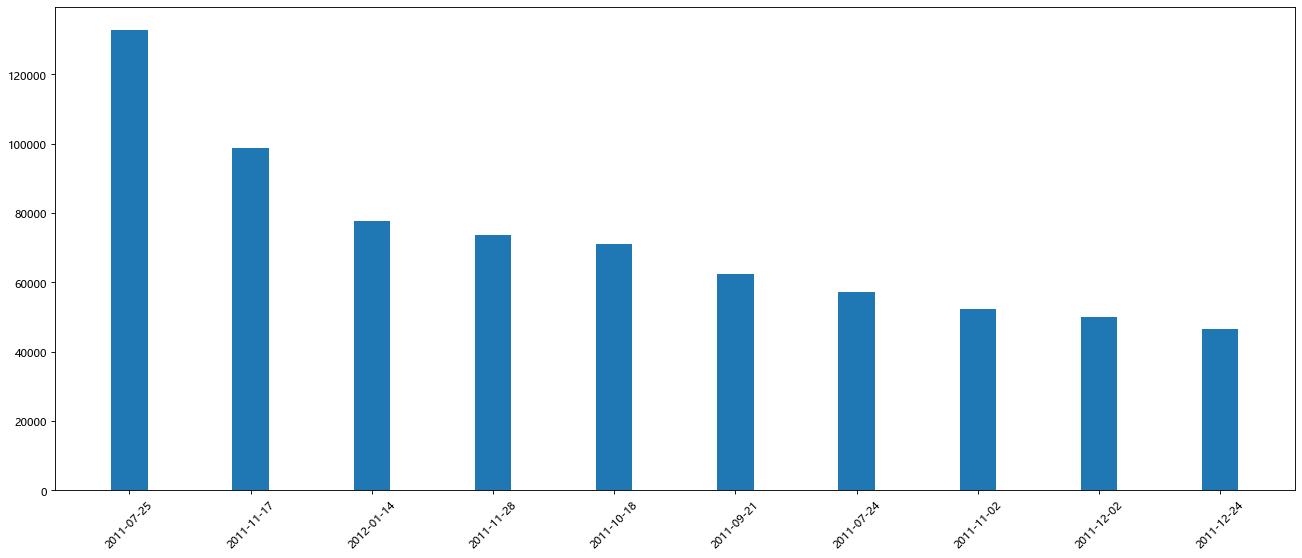

In [2]:
import matplotlib

font = {

    'family': 'Microsoft Yahei',

    "size": "10"

}

matplotlib.rc("font", **font)

a=['2011-07-25','2011-11-17','2012-01-14','2011-11-28','2011-10-18','2011-09-21','2011-07-24','2011-11-02','2011-12-02','2011-12-24']
b=[132753.0,98748.0,77722.0,73578.0,71047.0,62444.0,57083.0,52226.0,50072.0,46442.0]
plt.figure(figsize=(20,8),dpi=80)
plt.bar(range(len(a)),b,width=0.3)
plt.xticks(range(len(a)),a,rotation=45)
plt.show()

（3）Proportion of client sources who post Weibo
hive> select origin, (round(count(1)/219488*100,2))||'%' as num from web group by origin order by num desc limit 10;
iPhone	8.17%
Sina Weibo	52.95%
Pipi time machine	5.65%
Android	3.53%s
Enjoy Weibo	3.2%
S60Cient	3.17%
Sina Weibo Phone Cilent	2.07%
Sina Weibo Export Edition	1.74%
UC  Browser	1.69%
Smail	1.22%


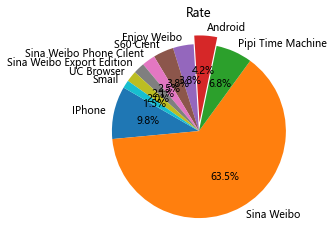

In [3]:
from  matplotlib import pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
labels = ['IPhone','Sina Weibo','Pipi Time Machine','Android','Enjoy Weibo','S60 Cient','Sina Weibo Phone Cilent','Sina Weibo Export Edition','UC Browser','Smail']
sizes = [8.17,52.95,5.65,3.53,3.2,3.17,2.07,1.74,1.69,1.22]
explode = (0,0,0,0.1,0,0,0,0,0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Rate")
plt.show()

6. Data Statistical Result Analysis
After the analysis of the above results, 53% are from the client Sina Weibo, and people like to share their daily life through Sina posts.
However, the familiar WeChat accounts for only 1.22%. The number of retweets on Weibo shows a trend of increasing month by month